In [39]:
import pandas as pd 
import numpy as np
import sys
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
## Customizing plots 
commonFontsize=8
def config_rcparams():
    plt.rcParams['font.family'] = ['sans-serif']
    plt.rcParams['font.sans-serif'] = ['arial']
    plt.rcParams['font.size'] = commonFontsize
    plt.rcParams['axes.labelsize'] = commonFontsize
    plt.rcParams['xtick.labelsize'] = commonFontsize
    plt.rcParams['ytick.labelsize'] = commonFontsize
    plt.rcParams['axes.titlesize'] = commonFontsize
    plt.rcParams['svg.fonttype'] = 'none'
    plt.rcParams['mathtext.fontset'] = 'custom'
    plt.rcParams['mathtext.cal'] = 'arial'
    plt.rcParams['mathtext.rm'] = 'arial'
    plt.rcParams['axes.edgecolor'] = 'black'
    plt.rcParams['ytick.color'] = 'black'
    plt.rcParams['axes.linewidth'] = 0.7
    plt.rcParams['xtick.major.width'] = 0.7
    plt.rcParams['ytick.major.width'] = 0.7
    plt.rcParams['xtick.major.size' ] = 3
    plt.rcParams['ytick.major.size' ] = 3
config_rcparams()

In [41]:
## Extracting tumor file name containing immune cells GSVA score
import glob, os
os.chdir("/workspace/projects/immunoproteasome/v1_copy_4/03_output/")
diff_immune_gsva_score_info=[]
for  i in glob.glob("high_low_immuno_prtoeasome_Diff_immune_score*.csv"):
    diff_immune_gsva_score_info.append(i.split('_')[7].split('.')[0])
os.chdir("/workspace/incubator/rahul_project/")

### Figure 3A. Differential Immune cells enrichment plot based on IP 

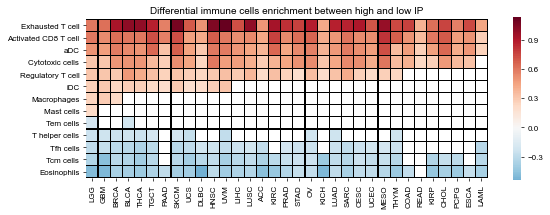

In [42]:
input_path2="/workspace/projects/immunoproteasome/v1_copy_4/03_output/"
df_immun_cell_diff=pd.DataFrame()
df_immun_cell_diff_p_value=pd.DataFrame()
for i in range(len(diff_immune_gsva_score_info)):
    diff_immune_cells_gsva_score=pd.read_csv(input_path2+'high_low_immuno_prtoeasome_Diff_immune_score_'+diff_immune_gsva_score_info[i]+'.csv')
    diff_immune_cells_gsva_score_v1=diff_immune_cells_gsva_score
    df_immun_cell_diff[diff_immune_gsva_score_info[i]]=diff_immune_cells_gsva_score_v1['logFC']
    df_immun_cell_diff_p_value[diff_immune_gsva_score_info[i]]=diff_immune_cells_gsva_score_v1['adj.P.Val']

df_immun_cell_diff.index=list(diff_immune_cells_gsva_score_v1['Unnamed: 0'])
df_immun_cell_diff_p_value.index=list(diff_immune_cells_gsva_score_v1['Unnamed: 0'])

df_tmp_p_value=df_immun_cell_diff_p_value[df_immun_cell_diff_p_value<0.1]
df_tmp_p_value1=df_tmp_p_value.where(~df_tmp_p_value.notna(),1)
df_tmp_sig_diff_immune=np.multiply(df_immun_cell_diff,df_tmp_p_value1)
df_tmp_sig_diff_immune1=df_tmp_sig_diff_immune[(df_tmp_sig_diff_immune>0.2)|(df_tmp_sig_diff_immune<-0.2)]
df_tmp_sig_diff_immune2=df_tmp_sig_diff_immune1.dropna(how='all')

df_tmpp=df_tmp_sig_diff_immune2[df_tmp_sig_diff_immune2>0]
df_tmpp2=pd.DataFrame(df_tmpp.count())
new_index_list=list(df_tmpp2.sort_values([0],ascending=False).index)
df_tmp_sig_diff_immune3=df_tmp_sig_diff_immune2.T.reindex(new_index_list).T
df_tmp_sig_diff_immune3.rename(index = {"Exhaustive T cell": "Exhausted T cell"},inplace = True)

fig=plt.figure(figsize=(9,3))
sns.heatmap(df_tmp_sig_diff_immune3,center=0,linewidths=0.1, linecolor='black',rasterized=False,square=True,cmap="RdBu_r")
plt.title('Differential immune cells enrichment between high and low IP',fontsize=10)
#plt.savefig("/workspace/projects/immunoproteasome/plots/"+'Diff_immune_Cell_infiltartion_high_low_IP_v1'+'.svg',bbox_inches = "tight",dpi=500)
plt.show()

### FIgure 3B. Differential Immune cells enrichment plot based on CP 

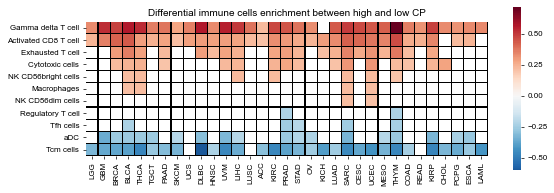

In [43]:
input_path2="/workspace/projects/immunoproteasome/v1_copy_4/03_output/"
df_immun_cell_diff=pd.DataFrame()
df_immun_cell_diff_p_value=pd.DataFrame()
for i in range(len(diff_immune_gsva_score_info)):
    diff_immune_cells_gsva_score=pd.read_csv(input_path2+'high_low_const_prtoeasome_Diff_immune_score_'+diff_immune_gsva_score_info[i]+'.csv')
    diff_immune_cells_gsva_score_v1=diff_immune_cells_gsva_score
    df_immun_cell_diff[diff_immune_gsva_score_info[i]]=diff_immune_cells_gsva_score_v1['logFC']
    df_immun_cell_diff_p_value[diff_immune_gsva_score_info[i]]=diff_immune_cells_gsva_score_v1['adj.P.Val']

df_immun_cell_diff.index=list(diff_immune_cells_gsva_score_v1['Unnamed: 0'])
df_immun_cell_diff_p_value.index=list(diff_immune_cells_gsva_score_v1['Unnamed: 0'])

df_tmp_p_value=df_immun_cell_diff_p_value[df_immun_cell_diff_p_value<0.1]
df_tmp_p_value1=df_tmp_p_value.where(~df_tmp_p_value.notna(),1)
df_tmp_sig_diff_immune=np.multiply(df_immun_cell_diff,df_tmp_p_value1)

df_tmp_sig_diff_immune1=df_tmp_sig_diff_immune[(df_tmp_sig_diff_immune>0.2)|(df_tmp_sig_diff_immune<-0.2)]
df_tmp_sig_diff_immune2=df_tmp_sig_diff_immune1.dropna(how='all')
df_tmp_sig_diff_immune3=df_tmp_sig_diff_immune2.T.reindex(new_index_list).T
df_tmp_sig_diff_immune3.rename(index = {"Exhaustive T cell": "Exhausted T cell"},inplace = True)

fig=plt.figure(figsize=(9,3))
sns.heatmap(df_tmp_sig_diff_immune3,center=0,linewidths=0.1, linecolor='black',square=True,rasterized=False,cmap="RdBu_r")
plt.title('Differential immune cells enrichment between high and low CP',fontsize=10)
#plt.savefig("/workspace/projects/immunoproteasome/plots/"+'Diff_immune_Cell_infiltartion_high_low_CP_v1'+'.svg',bbox_inches = "tight",dpi=500)
plt.show()

### Supplementary Table 3: Sample level GSVA score of 18 different immune across 33 tumour tisssue

In [44]:
## Extracting tumor file name containing immune cells GSVA score
import glob, os
os.chdir("/workspace/projects/immunoproteasome/v1_copy_4/03_output/")
immune_gsva_score_info=[]
for  i in glob.glob("GSVA_immune_cells*.tsv"):
    immune_gsva_score_info.append(i)
os.chdir("/workspace/incubator/rahul_project/")

In [45]:
## Generating Supplementary Table 3 containg immune cells GSVA score across 33 tumor tissue samples.
input_path2="/workspace/projects/immunoproteasome/v1_copy_4/03_output/"
df_list={}
for i in range(33):
    immune_cells_gsva_score=pd.read_csv(input_path2+immune_gsva_score_info[i],sep="\t")
    immune_cells_gsva_score1=immune_cells_gsva_score.T
    immune_cells_gsva_score1['Tissue type']=immune_gsva_score_info[i].split("_")[3].split('.')[0]
    df_list[i]=immune_cells_gsva_score1

immune_cell_df=pd.concat(df_list)
with pd.ExcelWriter('/workspace/projects/immunoproteasome/supplementary_tables/supple33.xlsx') as writer:  
    immune_cell_df.to_excel(writer, sheet_name='Sheet_name_1')